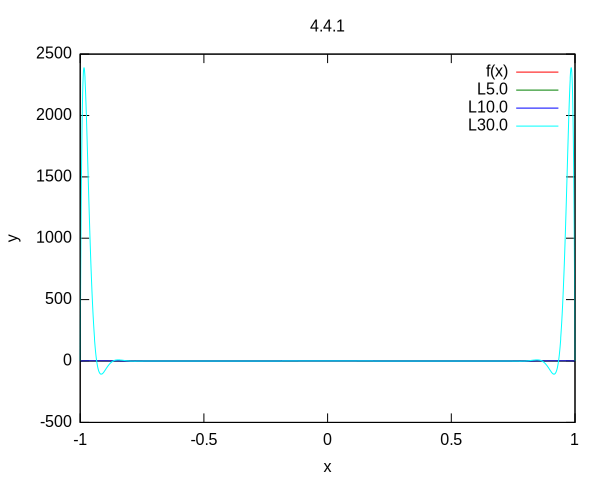

In [1]:
require 'gnuplot'

graphs = [] # 結果を格納する配列
def f(x); 1.0/(1.0 + x**2 * 25); end

# グラフを描画するxの値
sampling_x = (-1.0).step(1.0, 2.0/5000).map{|xi| xi}

# 実際の関数値
graphs.push(
  label: 'f(x)',
  x: sampling_x,
  y: sampling_x.map{|xi| f(xi)}
)

[5.0,10.0,30.0].each do |n|
  # 標本点[4.1.1]
  x = (-1.0).step(1.0, 2.0/n).map{|xi| xi}
  # 標本点[4.1.2]
  # x = 0.upto(n).map{|i| Math.cos((2*(n-i)+1)/(2*n+2)*Math::PI) } 
  graphs.push(
    label: "L#{n}",
    x: sampling_x,
    y: sampling_x.map{|val_x|
      # iごとに計算したLi(x)*f(x)の値の和を取る
      pn = 0.0
      x.each_with_index do |xi, i| 
        # take sum
        li = 1.0
        x.each_with_index do |xj, j|
          next if i == j
          li *= (val_x - xj) / (xi - xj)
        end
        pn += li*f(xi)
      end
      pn
    }
  )
end

Gnuplot::Plot.new do |plot|
  plot.title '4.4.1'
  plot.xlabel 'x'
  plot.ylabel 'y'
   graphs.each do |graph|
    plot.data << Gnuplot::DataSet.new([graph[:x], graph[:y]]) do |ds|
      ds.with = "lines"
      ds.linewidth = 1
      ds.title = graph[:label]
    end
  end
end

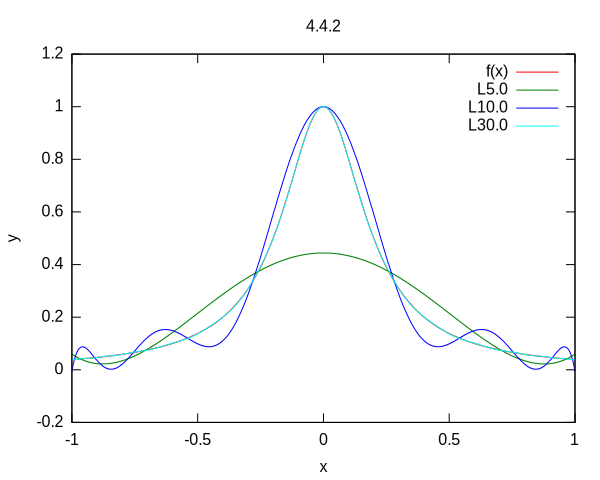

In [2]:
require 'gnuplot'

graphs = [] # 結果を格納する配列
def f(x); 1.0/(1.0 + x**2 * 25); end

# グラフを描画するxの値
sampling_x = (-1.0).step(1.0, 2.0/5000).map{|xi| xi}

# 実際の関数値
graphs.push(
  label: 'f(x)',
  x: sampling_x,
  y: sampling_x.map{|xi| f(xi)}
)

[5.0,10.0,30.0].each do |n|
  # 標本点[4.1.1]
  # x = (-1.0).step(1.0, 2.0/n).map{|xi| xi}
  # 標本点[4.1.2]
  x = 0.upto(n).map{|i| Math.cos((2*(n-i)+1)/(2*n+2)*Math::PI) } 
  graphs.push(
    label: "L#{n}",
    x: sampling_x,
    y: sampling_x.map{|val_x|
      # iごとに計算したLi(x)*f(x)の値の和を取る
      pn = 0.0
      x.each_with_index do |xi, i| 
        # take sum
        li = 1.0
        x.each_with_index do |xj, j|
          next if i == j
          li *= (val_x - xj) / (xi - xj)
        end
        pn += li*f(xi)
      end
      pn
    }
  )
end

Gnuplot::Plot.new do |plot|
  plot.title '4.4.2'
  plot.xlabel 'x'
  plot.ylabel 'y'
   graphs.each do |graph|
    plot.data << Gnuplot::DataSet.new([graph[:x], graph[:y]]) do |ds|
      ds.with = "lines"
      ds.linewidth = 1
      ds.title = graph[:label]
    end
  end
end

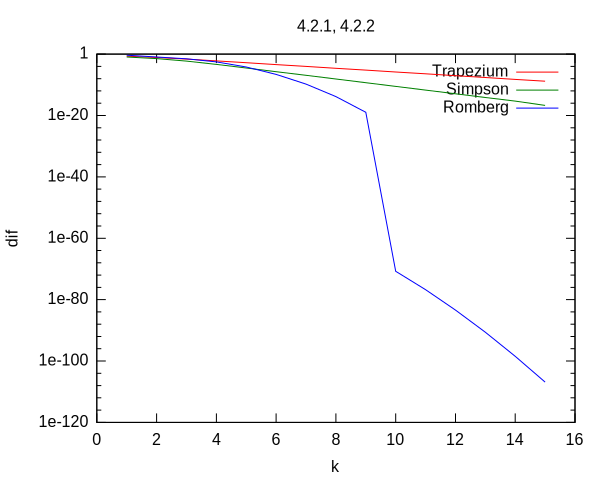

In [3]:
require 'bigdecimal'

def f(x); x**19; end
integral_x = BigDecimal.new('1.0')/20

def romberg(n, a, b)
  # コードの読みやすさの観点から、配列の添え字は0ではなく1から始まるものとする
  def h(i,a,b); (b-a)/(2**(i-1)); end
  r = (n+1).times.map{[]}
  # 合成台形公式によりr[i][1]を計算する
  r[1][1] = (h(1,a,b)/2.0)*(f(a)+f(b))
  2.upto(n).each do |i|
    sigma = 1.upto(2**(i-2)).map{|k| f( a+(2*k-1)*h(i,a,b) )}.inject(&:+)
    r[i][1] = 0.5*( r[i-1][1] + h(i-1,a,b)*sigma )
  end
  # リチャードソンの補外法を計算する
  2.upto(n) do |i|
    2.upto(i) do |j|
      r[i][j] = r[i][j-1] + (r[i][j-1]-r[i-1][j-1])/(4**(j-1)-1)
    end
  end
  r[n][n]
end

ks=[]; daikeis=[]; simps=[]; roms=[]
1.upto(15).each do |k|
  n = 2**k
  dx = 1.0/n

  #　横軸の値
  ks.push(k)

  # 複合台形公式による計算
  d = dx.step(1.0, dx).map{|x|
    (f(x) + f(x-dx)) * dx / 2
  }.inject(&:+)
  daikeis.push(d - integral_x)

  # 複合シンプソン公式による計算
  ss1 = 0.0
  1.upto(n/2-1).each do |i|
    ss1 += f(0 + 1.0/n * 2*i)
  end
  ss2 = 0.0
  1.upto(n/2).each do |i|
    ss2 += f(0 + 1.0/n * (2*i-1))
  end
  s = 1.0/(3.0*n) * (f(1.0)+f(0.0) + 2.0 * ss1 + 4.0*ss2)
  simps.push(s -integral_x)

  # ロンバーグ積分法による計算
  rom = romberg(k, BigDecimal.new('0.0'), BigDecimal.new('1.0'))
  roms.push((rom-integral_x).abs)
end

Gnuplot::Plot.new() do |plot|
  plot.title '4.2.1, 4.2.2'
  plot.xlabel 'k'
  plot.ylabel 'dif'
  plot.logscale 'y'

  plot.data << Gnuplot::DataSet.new([ks, daikeis]) do |ds|
    ds.title = 'Trapezium'
    ds.with = "lines"
    ds.linewidth = 1
  end
  plot.data << Gnuplot::DataSet.new([ks, simps]) do |ds|
    ds.title = 'Simpson'
    ds.with = "lines"
    ds.linewidth = 1
  end
  plot.data << Gnuplot::DataSet.new([ks, roms]) do |ds|
    ds.title = 'Romberg'
    ds.with = "lines"
    ds.linewidth = 1
  end
end

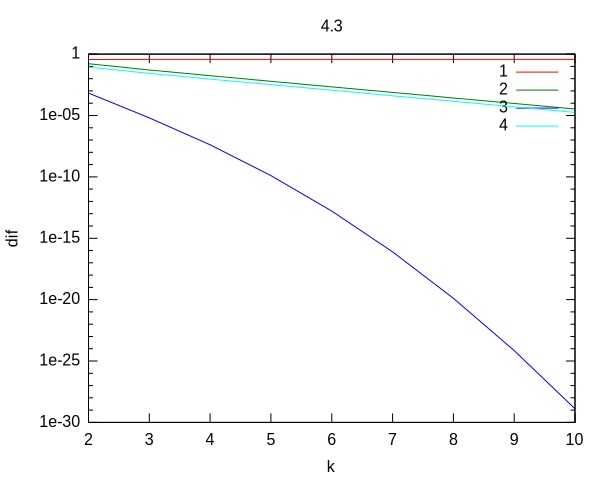

In [4]:
require 'bigdecimal/math'
include BigMath

def romberg(n, a, b, f)
  # コードの読みやすさの観点から、配列の添え字は0ではなく1から始まるものとする
  def h(i,a,b); BigDecimal.new(b-a)/(2**(i-1)); end
  r = (n+1).times.map{[]}
  # 合成台形公式によりr[i][1]を計算する
  r[1][1] = (h(1,a,b)/2.0)*(f[a]+f[b])
  2.upto(n).each do |i|
    sigma = 1.upto(2**(i-2)).map{|k| f[ a+(2*k-1)*h(i,a,b) ]}.inject(&:+)
    r[i][1] = 0.5*( r[i-1][1] + h(i-1,a,b)*sigma )
  end
  # リチャードソンの補外法を計算する
  2.upto(n) do |i|
    2.upto(i) do |j|
      r[i][j] = r[i][j-1] + (r[i][j-1]-r[i-1][j-1])/(4**(j-1)-1)
    end
  end
  r[n][n]
end

exact_pi = PI(100)
plot_x = []
plot_y = (4).times.map{[]}
f1 = Proc.new{|x| 1/(1+BigDecimal.new(x))}
f2 = Proc.new{|x| (1-BigDecimal.new(x)**2).sqrt(100)}
2.upto(10) do |k|
  plot_x.push k
  plot_y[0].push(romberg(k, 0, 1, f1)*4)
  plot_y[1].push(romberg(k, 0, 1, f2)*4)
  plot_y[2].push(
    romberg(k,0,BigDecimal.new('0.5'),f2)*12 - BigDecimal.new(3).sqrt(100)*12/8
  )
  plot_y[3].push(
    romberg(k,BigDecimal.new('0.5'),1,f2)*6 + BigDecimal.new(3).sqrt(100)*3/4
  )
end
plot_y = plot_y.map{|arr| arr.map{|val| (val-exact_pi).abs}}
Gnuplot::Plot.new do |plot|
  plot.title '4.3'
  plot.xlabel 'k'
  plot.ylabel 'dif'
  plot.logscale 'y'

  plot_y.each_with_index do |p, i|
    plot.data << Gnuplot::DataSet.new([plot_x, p]) do |ds|
      ds.title = "#{i+1}"
      ds.with = "lines"
      ds.linewidth = 1
    end
  end
end